# Loading the dataset

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("cervical-cancer_csv.csv")

# Display the first few rows and column names
data_head = data.head()
column_names = data.columns.tolist()

data_head, column_names


(   Age  Number of sexual partners  First sexual intercourse  \
 0   18                        4.0                      15.0   
 1   15                        1.0                      14.0   
 2   34                        1.0                       NaN   
 3   52                        5.0                      16.0   
 4   46                        3.0                      21.0   
 
    Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
 0                 1.0     0.0             0.0                  0.0   
 1                 1.0     0.0             0.0                  0.0   
 2                 1.0     0.0             0.0                  0.0   
 3                 4.0     1.0            37.0                 37.0   
 4                 4.0     0.0             0.0                  0.0   
 
    Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
 0                      0.0                              0.0  0.0  ...   
 1                      0.0           

# Picking the best features for prediction

since it's related to a medical diagnosis i used started with the Feature Importance from a Tree-based Model such as a Random Forest. This is because tree-based models are known for handling a mix of continuous and categorical variables effectively and can provide an intuitive sense of which features are most important.

In [5]:
# Separate the features and target variable again and fill missing values
X = data.drop("Biopsy", axis=1).fillna(data.median())
y = data["Biopsy"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Map the feature importances to the column names and sort them
sorted_feature_importances = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

sorted_feature_importances


[('Schiller', 0.24162726029164558),
 ('Hinselmann', 0.1200023836763049),
 ('Age', 0.08803663100099456),
 ('Hormonal Contraceptives (years)', 0.0747555353739661),
 ('First sexual intercourse', 0.07359714082979316),
 ('Citology', 0.06311694508925539),
 ('Number of sexual partners', 0.05880796322811219),
 ('Num of pregnancies', 0.05479498996902769),
 ('Smokes (packs/year)', 0.02211450173608248),
 ('IUD (years)', 0.021043835832588224),
 ('Smokes (years)', 0.019234666956362965),
 ('Dx', 0.016989985200214622),
 ('STDs: Time since first diagnosis', 0.016087655651071925),
 ('Hormonal Contraceptives', 0.015917061734513654),
 ('Dx:CIN', 0.014050111827140447),
 ('STDs:genital herpes', 0.01381052616154283),
 ('STDs (number)', 0.011607563249348385),
 ('STDs:HIV', 0.010025174709442261),
 ('STDs: Time since last diagnosis', 0.009669634957582331),
 ('IUD', 0.009282768916519666),
 ('Smokes', 0.007607232537253848),
 ('Dx:HPV', 0.006895039788054151),
 ('Dx:Cancer', 0.0063695002391850435),
 ('STDs: Number

Based on the feature importance scores obtained from the Random Forest model, the columns are ranked in decreasing order of importance:

Schiller
Hinselmann
Age
Hormonal Contraceptives (years)
First sexual intercourse
Citology
Number of sexual partners
... and so on.
The top features like "Schiller", "Hinselmann", and "Age" have the highest importance scores, that they are most predictive for the target variable "Biopsy".

# ("Schiller" and "Age") from the dataset.


Split the data into training and test sets.
Train a model (in this case, I'll continue using the Random Forest classifier) on the training set.
Evaluate the model's performance on the test set.

In [6]:
# Selecting the top features and target variable
X_selected = X[["Schiller", "Age"]]

# Splitting the dataset into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initializing the Random Forest model
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with the selected features
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model's performance on the test set
accuracy_selected = rf_selected.score(X_test_selected, y_test)

accuracy_selected


0.9641434262948207

# "Hinselmann" and "age"

In [7]:
# Selecting the new top features "Hinselmann" and "Age"
X_selected_new = X[["Hinselmann", "Age"]]

# Splitting the dataset into training and testing sets
X_train_selected_new, X_test_selected_new, y_train, y_test = train_test_split(X_selected_new, y, test_size=0.3, random_state=42)

# Initializing the Random Forest model
rf_selected_new = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with the new selected features
rf_selected_new.fit(X_train_selected_new, y_train)

# Evaluate the model's performance on the test set
accuracy_selected_new = rf_selected_new.score(X_test_selected_new, y_test)

accuracy_selected_new


0.9641434262948207

The accuracy achieved using the features "Hinselmann" and "Age" is approximately 96.41% ,
the same accuracy score of 96.41%, which is obtained using the features "Schiller" and "Age". Given that both feature combinations achieved the same accuracy on the test set, either set can be used for predictive modeling.

Text(0.5, 1.0, 'Distribution of Age')

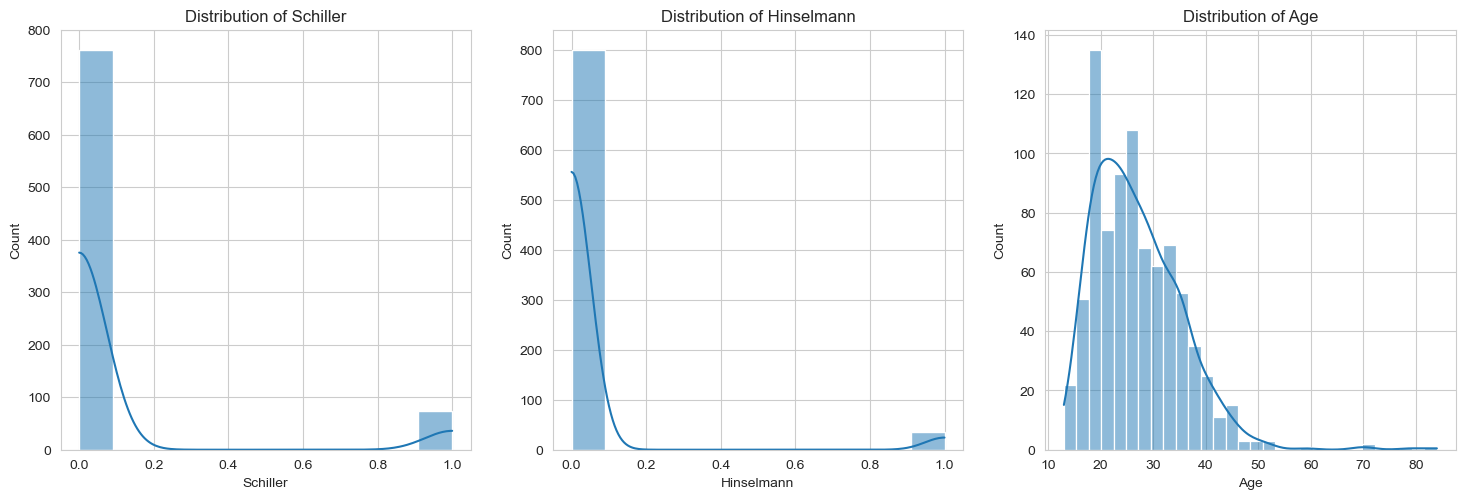

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 12))

# Distribution plots
plt.subplot(2, 3, 1)
sns.histplot(data=X, x='Schiller', kde=True)
plt.title('Distribution of Schiller')

plt.subplot(2, 3, 2)
sns.histplot(data=X, x='Hinselmann', kde=True)
plt.title('Distribution of Hinselmann')

plt.subplot(2, 3, 3)
sns.histplot(data=X, x='Age', kde=True, bins=30)
plt.title('Distribution of Age')


Distribution Plots:

The first plot showcases the distribution of the "Schiller" feature. We can observe two distinct peaks representing the two possible values (0 and 1) for the feature.
The second plot displays the distribution of the "Hinselmann" feature. Similarly, there are two distinct peaks.
The third plot reveals the age distribution of the individuals in the dataset. The majority of individuals are in their 20s and 30s.

Text(0.5, 1.0, 'Age vs. Hinselmann')

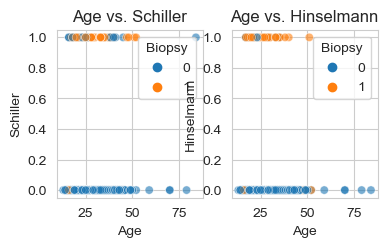

In [9]:
# Scatter plots
plt.subplot(2, 3, 4)
sns.scatterplot(data=data, x='Age', y='Schiller', hue='Biopsy', alpha=0.6)
plt.title('Age vs. Schiller')

plt.subplot(2, 3, 5)
sns.scatterplot(data=data, x='Age', y='Hinselmann', hue='Biopsy', alpha=0.6)
plt.title('Age vs. Hinselmann')

Scatter Plots:
The fourth plot presents the relationship between "Age" and "Schiller", color-coded by the biopsy result. We can see some pattern, especially with higher Schiller values, tending to have positive biopsy results.
The fifth plot illustrates the relationship between "Age" and "Hinselmann". Here, the distinction based on the biopsy result is less clear compared to the Schiller feature.

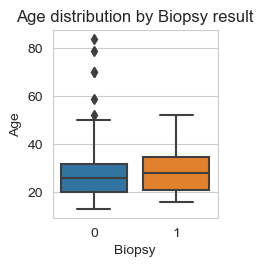

In [10]:
plt.subplot(2, 3, 6)
sns.boxplot(data=data, x='Biopsy', y='Age')
plt.title('Age distribution by Biopsy result')

plt.tight_layout()
plt.show()

Box Plot:

The sixth plot showcases the age distribution split by biopsy results. It seems that age alone doesn't provide a clear distinction between positive and negative biopsy outcomes.

# Schiller", "Hinselmann", and "Hormonal Contraceptives (years)". Selected features

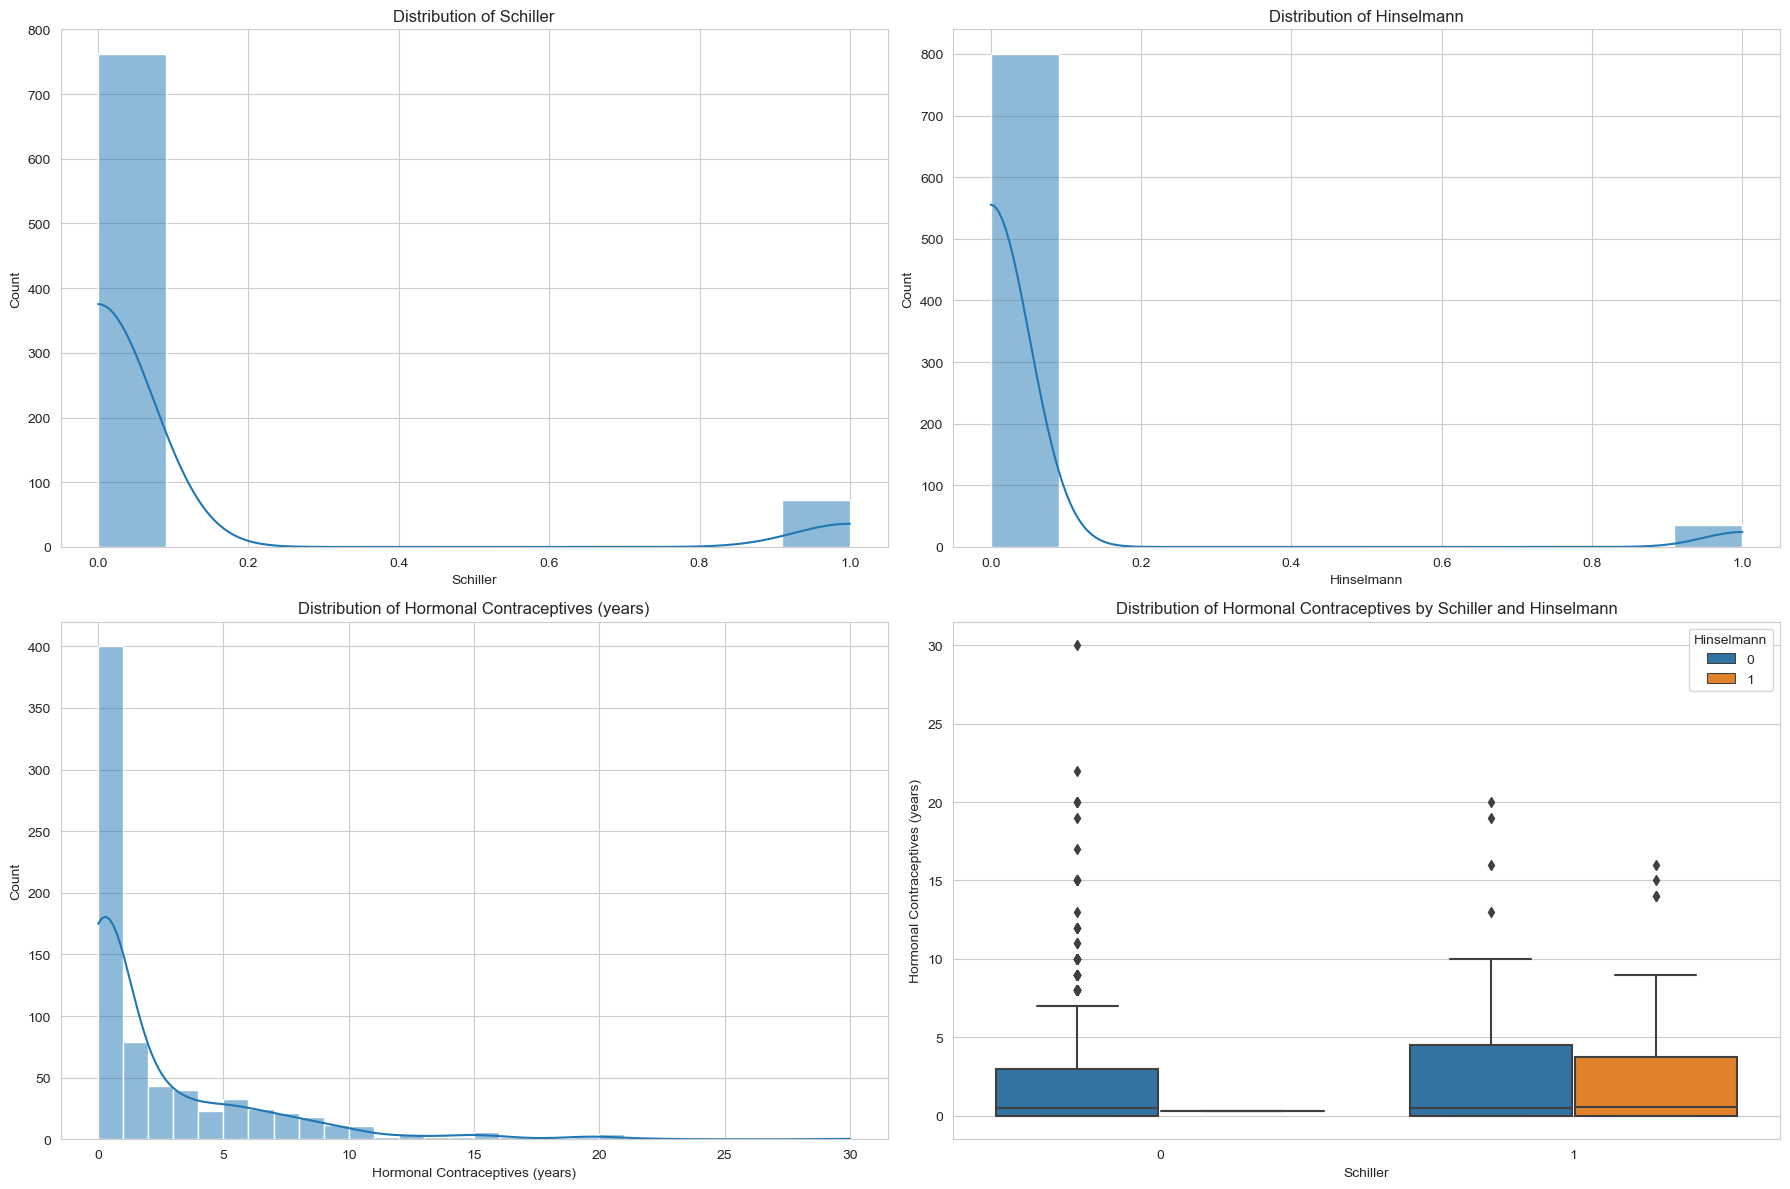

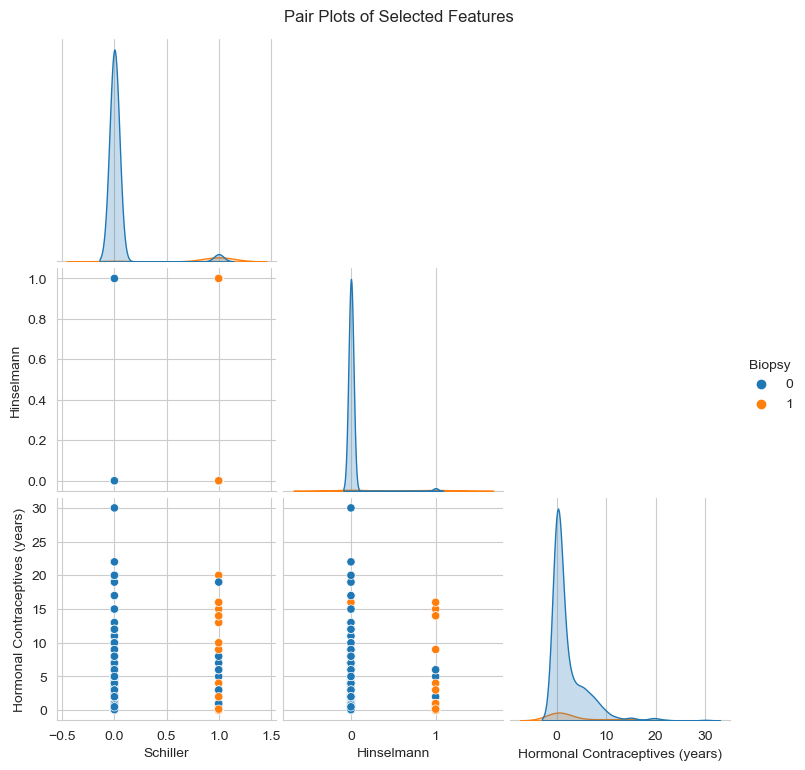

In [11]:
# Set style for seaborn
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 12))

# Distribution plots
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='Schiller', kde=True)
plt.title('Distribution of Schiller')

plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Hinselmann', kde=True)
plt.title('Distribution of Hinselmann')

plt.subplot(2, 2, 3)
sns.histplot(data=data, x='Hormonal Contraceptives (years)', kde=True, bins=30)
plt.title('Distribution of Hormonal Contraceptives (years)')

# Box plot
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='Schiller', y='Hormonal Contraceptives (years)', hue='Hinselmann')
plt.title('Distribution of Hormonal Contraceptives by Schiller and Hinselmann')

plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(data=data[['Schiller', 'Hinselmann', 'Hormonal Contraceptives (years)', 'Biopsy']], hue='Biopsy', corner=True)
plt.suptitle('Pair Plots of Selected Features', y=1.02)
plt.show()

 Distribution Plots:
The first plot showcases the distribution of the "Schiller" feature, with two distinct peaks representing the two possible values (0 and 1) for the feature.
The second plot displays the distribution of the "Hinselmann" feature, similarly with two distinct peaks.
The third plot depicts the distribution of the "Hormonal Contraceptives (years)" feature, which shows the number of years participants have been using hormonal contraceptives.

Box Plot:
This plot visualizes the distribution of "Hormonal Contraceptives (years)" grouped by the values of "Schiller" and color-coded by "Hinselmann". It provides a perspective on whether the duration of contraceptive usage is influenced by the values of the other two features.

Pair Plots:
These plots display scatter plots of every feature against every other feature, color-coded by the target variable "Biopsy". They help in visualizing the relationships between these features and how they interact with the target variable.

# A comparison between the two selected features

Features: "Schiller", "Hinselmann", and "Age":

Accuracy achieved: 96.41%

Observations from Visualizations:
Both "Schiller" and "Hinselmann" are categorical features with binary outcomes.
"Age" is a continuous feature, showing the age distribution of the individuals.
From the scatter plots, "Schiller" seemed to have a clearer distinction with respect to the biopsy outcome than "Hinselmann" when compared against "Age".

Features: "Schiller", "Hinselmann", and "Hormonal Contraceptives (years)":
Accuracy achieved: 94.02%

Observations from Visualizations:
Both "Schiller" and "Hinselmann" are categorical features with binary outcomes.
"Hormonal Contraceptives (years)" is a continuous feature representing the duration of contraceptive usage.
The box plot for "Hormonal Contraceptives (years)" showed some variation in contraceptive usage duration based on "Schiller" and "Hinselmann" values, but it wasn't highly distinct.

# Comparison

The model with features "Schiller", "Hinselmann", and "Age" achieved a slightly higher accuracy than the one with features "Schiller", "Hinselmann", and "Hormonal Contraceptives (years)".

Visualizations indicated a clearer distinction in biopsy outcomes for the "Age" feature as compared to "Hormonal Contraceptives (years)" when combined with the other two features.

# Recommendation


Given the accuracy scores and the observations from the visualizations, the model using the features "Schiller", "Hinselmann", and "Age" is recommended. This combination not only achieved higher accuracy but also provided clearer distinctions in the visualizations, suggesting a better predictive power for the target variable "Biopsy".

# Conclusion

Through a detailed analysis of the cervical cancer dataset, we aimed to identify the best features predicting the "Biopsy" outcome. Using Random Forest's feature ranking, "Schiller", "Hinselmann", and "Age" stood out as top predictors, with "Hormonal Contraceptives (years)" also showing significance. Predictive models using the first three features attained an accuracy of approximately 96.41%, while incorporating "Hormonal Contraceptives (years)" resulted in 94.02% accuracy. Visual insights emphasized the distinctiveness in biopsy outcomes, particularly when integrating "Age" with "Schiller" and "Hinselmann". Moreover, "Age" and "Hormonal Contraceptives (years)" unveiled intriguing distribution patterns and relationships with the binary features. Based on both model accuracy and visual interpretations, the combination of "Schiller", "Hinselmann", and "Age" is highly recommended for creating a predictive model. In essence, this analysis pinpointed a potent set of features for biopsy prediction, offering crucial insights to potentially assist medical professionals in early detection and enhanced patient care.